# Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("fivethirtyeight")

# GET DATA FROM KAGGLE

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "blastchar/telco-customer-churn",
  file_path,
)



c:\Users\Administrator\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2512\3690047211.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies    

# Describe Data

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.drop(columns = ['customerID'], inplace=True)

In [8]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
df['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [11]:
for col in df.columns:
    if col not in ['tenure', 'MonthlyCharges', 'TotalCharges']:
        print(col, df[col].unique())
        print("-------------------------------------")

gender ['Female' 'Male']
-------------------------------------
SeniorCitizen [0 1]
-------------------------------------
Partner ['Yes' 'No']
-------------------------------------
Dependents ['No' 'Yes']
-------------------------------------
PhoneService ['No' 'Yes']
-------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
-------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
-------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
-------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
-------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
-------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
-------------------------------------
StreamingTV ['No' 'Yes' 'No internet service']
-------------------------------------
StreamingMovies ['No' 'Yes' 'No internet service']
-------------------------------------
Contra

In [12]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    print(col, len(df[df[col]== " "]))
    print("-------------------------------------")

tenure 0
-------------------------------------
MonthlyCharges 0
-------------------------------------
TotalCharges 11
-------------------------------------


In [14]:
df['TotalCharges'] = df['TotalCharges'].replace({" ": "0.0"}).astype(float)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


In [16]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

# Exploratory Data Analysis

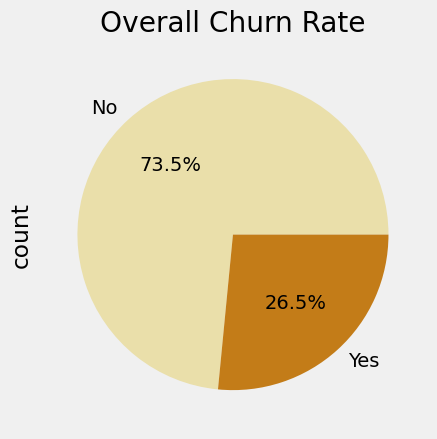

In [17]:
df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=["#eadfaa","#c37c18"])
plt.title('Overall Churn Rate')
plt.show()


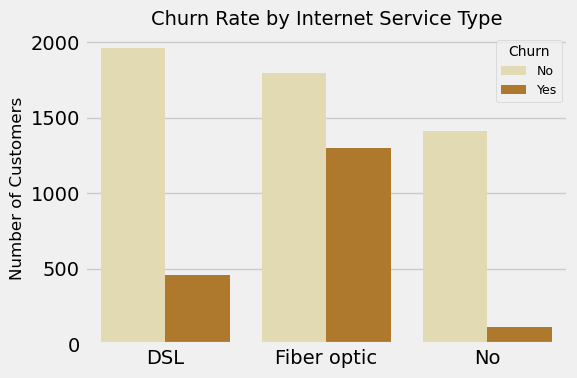

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='InternetService', hue='Churn', palette=["#eadfaa","#c37c18"])
plt.title('Churn Rate by Internet Service Type', fontsize=14)
plt.xlabel('')
plt.ylabel('Number of Customers', fontsize=12)
plt.legend(
    title='Churn',
    labels=['No', 'Yes'],
    loc='upper right',   
    fontsize=9,       
    title_fontsize=10
)
plt.tight_layout()
plt.show()


In [19]:
def plot_distribution(df, column_name):
    colors = ["#eadfaa", "#c37c18"]
    
    plt.figure(figsize=(12, 4))
    
    # Histogram + KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df[column_name], kde=True, color=colors[0])
    plt.title(f"Distribution of {column_name}")
    
    col_mean = df[column_name].mean()
    col_median = df[column_name].median()
    
    plt.axvline(col_mean, color=colors[1], linestyle="--", label="Mean")
    plt.axvline(col_median, color="green", linestyle="--", label="Median")  # ممكن تختار لون ثاني إذا تحب
    
    plt.legend()
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df["Churn"], y=df[column_name], palette=colors)
    plt.title(f"Boxplot of {column_name}")
    
    plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_2512\1148391138.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Churn"], y=df[column_name], palette=colors)


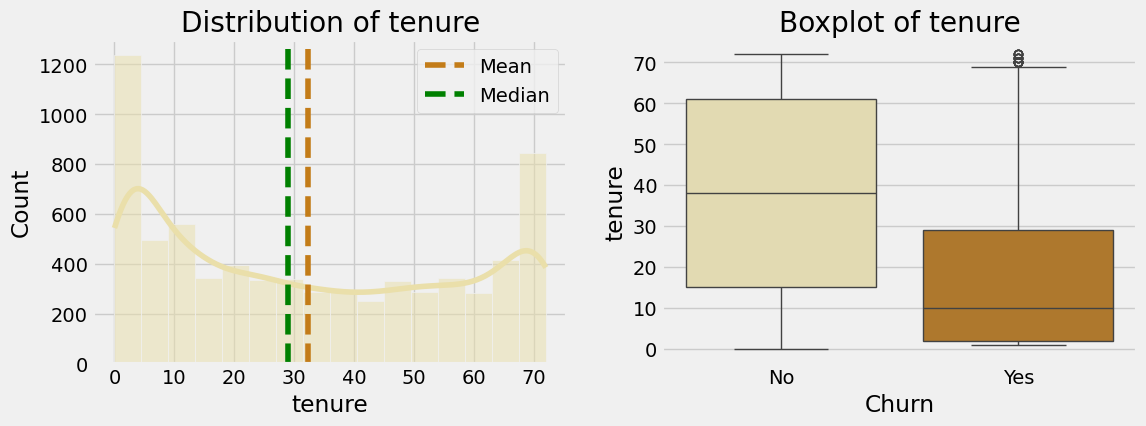

In [20]:
plot_distribution(df, "tenure")

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2512\1148391138.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Churn"], y=df[column_name], palette=colors)


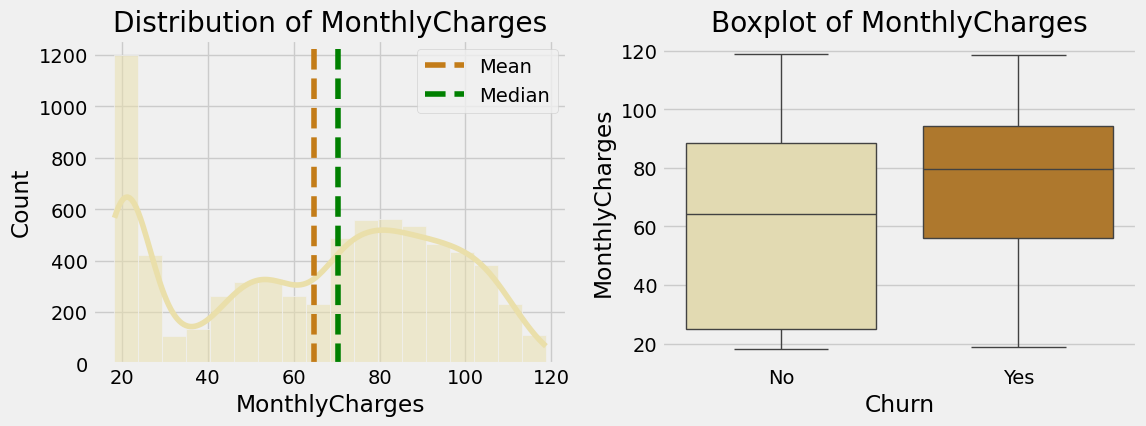

In [21]:
plot_distribution(df, "MonthlyCharges")

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2512\1148391138.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Churn"], y=df[column_name], palette=colors)


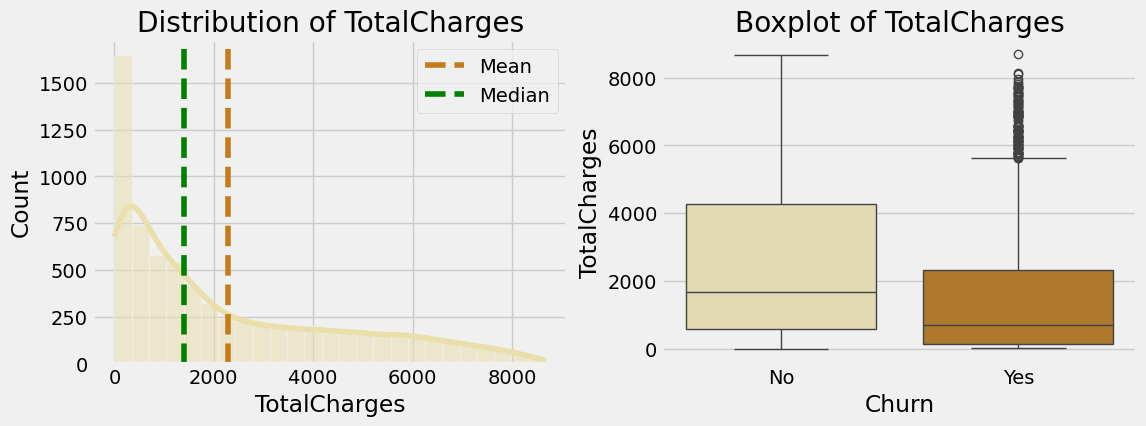

In [22]:
plot_distribution(df, "TotalCharges")

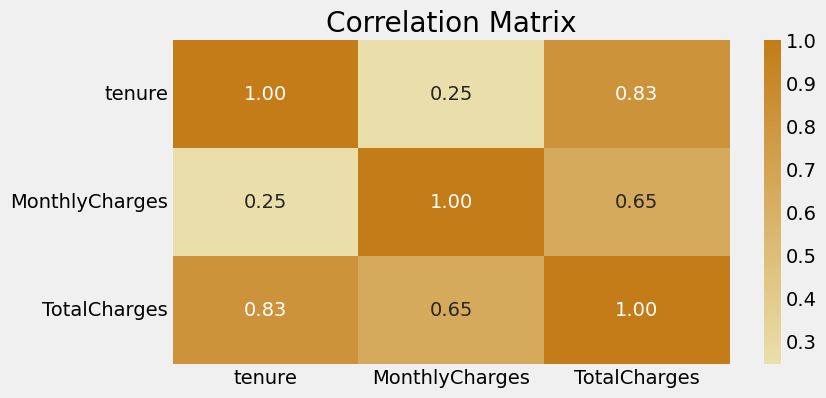

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap




colors = ["#eadfaa", "#c37c18"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

plt.figure(figsize=(8, 4))
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(),
            annot=True, cmap=cmap, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

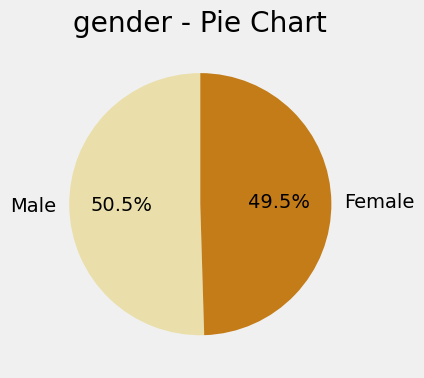

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2512\818346322.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette=colors)


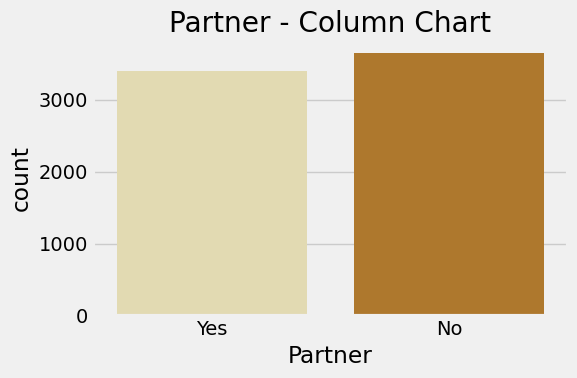

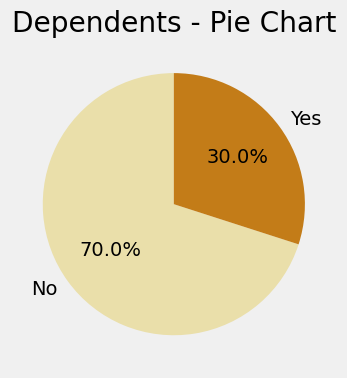

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2512\818346322.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette=colors)


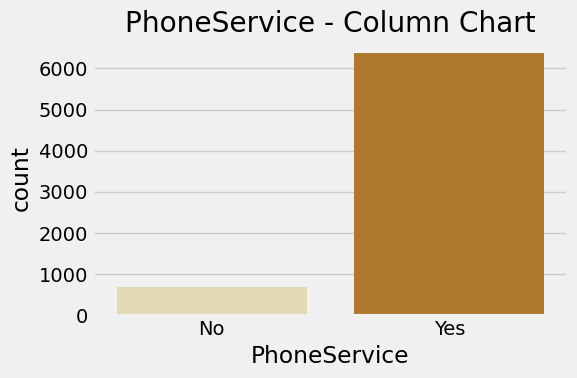

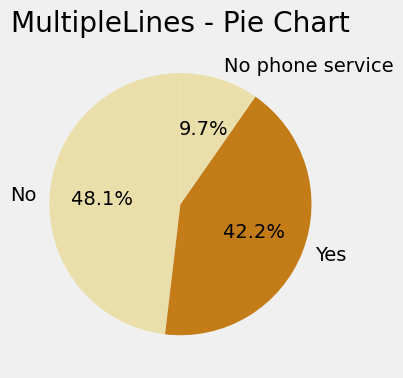

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2512\818346322.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette=colors)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2512\818346322.py:22: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df[col], palette=colors)


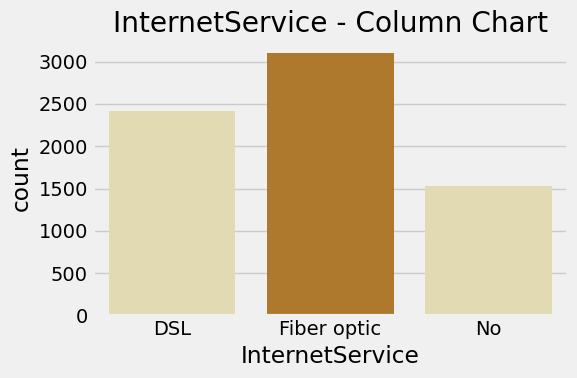

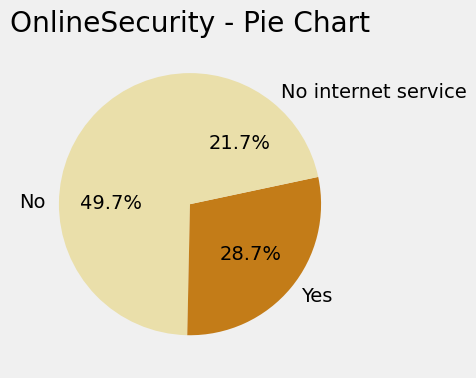

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2512\818346322.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette=colors)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2512\818346322.py:22: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df[col], palette=colors)


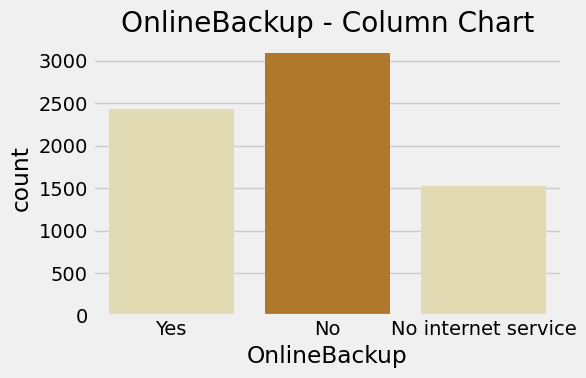

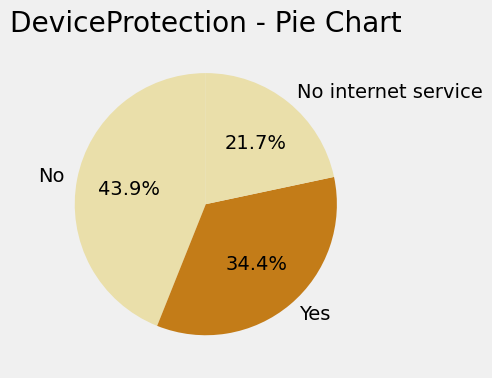

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2512\818346322.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette=colors)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2512\818346322.py:22: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df[col], palette=colors)


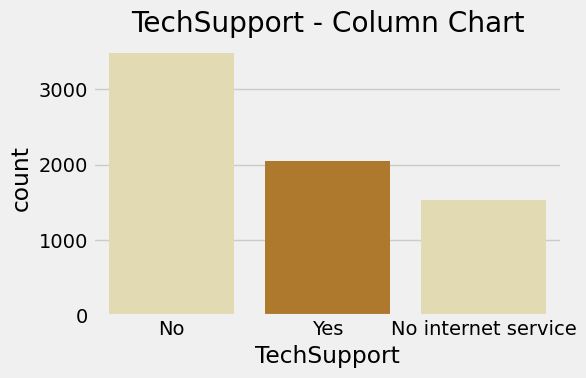

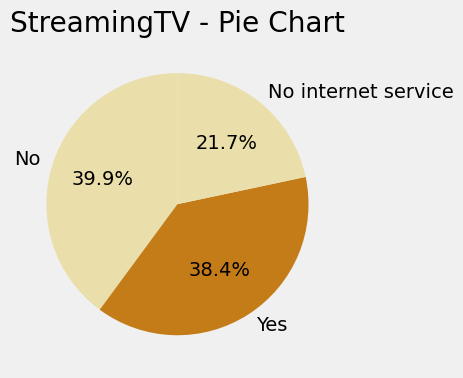

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2512\818346322.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette=colors)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2512\818346322.py:22: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df[col], palette=colors)


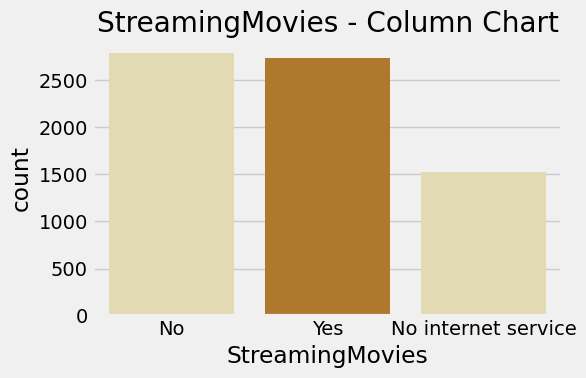

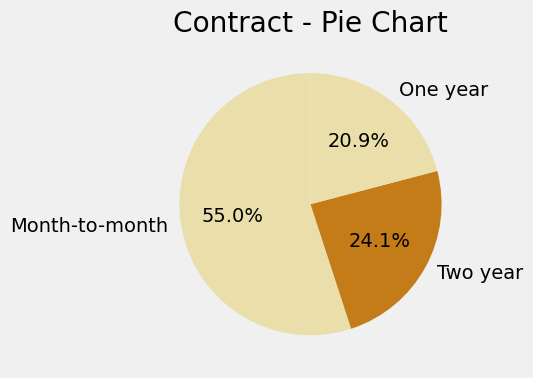

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2512\818346322.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette=colors)


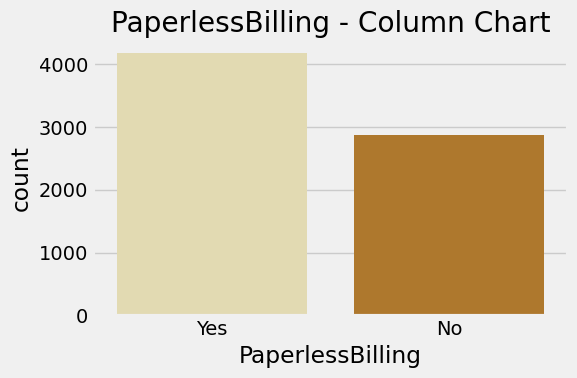

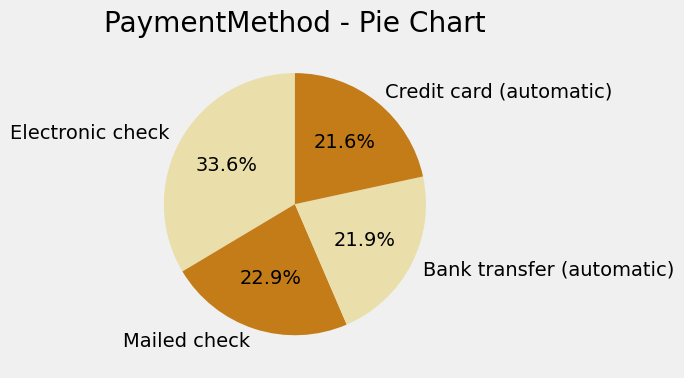

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2512\818346322.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette=colors)


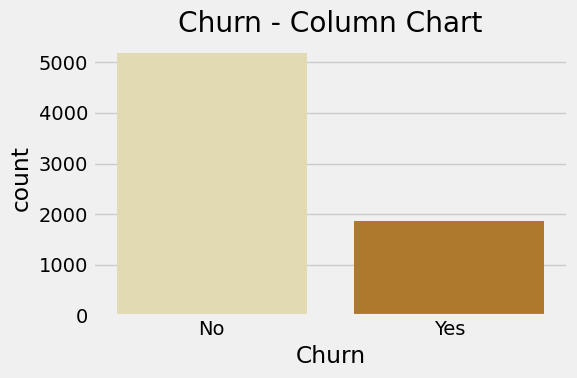

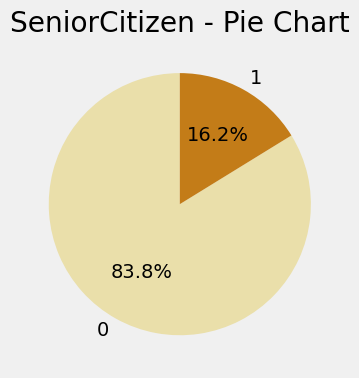

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns


categorical_cols = df.select_dtypes(include="object").columns.to_list() + ['SeniorCitizen']

for i, col in enumerate(categorical_cols):
    plt.figure(figsize=(6, 4))

    # لو رقم العمود زوجي → ارسم Pie Chart
    if i % 2 == 0:
        df[col].value_counts().plot.pie(
            autopct='%1.1f%%', 
            startangle=90,
            colors=colors
        )
        plt.title(f"{col} - Pie Chart")
        plt.ylabel('')

    # لو رقم العمود فردي → ارسم Column Chart
    else:
        sns.countplot(x=df[col], palette=colors)
        plt.title(f"{col} - Column Chart")

    plt.tight_layout()
    plt.show()


# Encoding

In [26]:
df['Churn'] = df['Churn'].replace({"Yes": 1, "No": 0})

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2512\196801821.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({"Yes": 1, "No": 0})


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [28]:
objects_columns = df.select_dtypes(include = "object").columns

In [29]:
objects_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [30]:
from sklearn.preprocessing import LabelEncoder

encoders = {}

for column in objects_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    encoders[column] = label_encoder

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  
